In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Suppress warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import shap

# Set font before plotting
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Data PreProcessing

In [2]:
# Read the CSV
df = pd.read_csv('C:/Users/User/Downloads/Kyushu Datasheets/data_with_press_and_weather.csv', low_memory=False)

# Drop rows with excessive missing values
missing_count = df.isnull().sum().sum()
if missing_count > 0:
    threshold = df.shape[1] // 2
    df = df.dropna(thresh=threshold + 1)
    print(f"Rows with more than half NaN dropped. Remaining rows: {len(df)}")
else:
    print("No missing values found.")

# Clean and filter '강번'
df['강번'] = pd.to_numeric(df['강번'], errors='coerce')
df = df.dropna(subset=['강번'])
df = df[df['강번'].between(9000, 500000000)]


# For double checking
df.to_csv('For_my_use_1.csv', index=False)

Rows with more than half NaN dropped. Remaining rows: 2811


In [3]:
print(f"Rows with more than half NaN dropped. Remaining rows: {len(df)}")

Rows with more than half NaN dropped. Remaining rows: 2805


In [4]:
chin_variables = [col for col in df.columns if '친' in col and '친단\u3000손' not in col and '친단\u3000자' not in col]
son_variables = [col for col in df.columns if '손' in col]
ja_variables = [col for col in df.columns if '자' in col and '자동차' not in col and '부자재' not in col]

df['chin_total'] = df[chin_variables].sum(axis=1)
df['son_total'] = df[son_variables].sum(axis=1)
df['ja_total'] = df[ja_variables].sum(axis=1)

if 'chin_total' in df.columns:
    target_value = len(df)
    df = df[df['chin_total'] <= 40000]
    removed_target_value = target_value - len(df)
    print(f"Removed {removed_target_value} rows where 'chin_total' > 40000.")
else:
    print(f"Warning: '장입량t' column not found.")

if '수율' in df.columns:
    target_value = len(df)
    df = df[df['수율'] >= 50]
    df = df[df['수율'] <= 110]
    removed_target_value = target_value - len(df)
    print(f"Removed {removed_target_value} rows where 'chin_total' < 50.")
else:
    print(f"Warning: '장입량t' column not found.")

Removed 1 rows where 'chin_total' > 40000.
Removed 11 rows where 'chin_total' < 50.


# 친

스크랩_S01_친: Mean = 8000.00


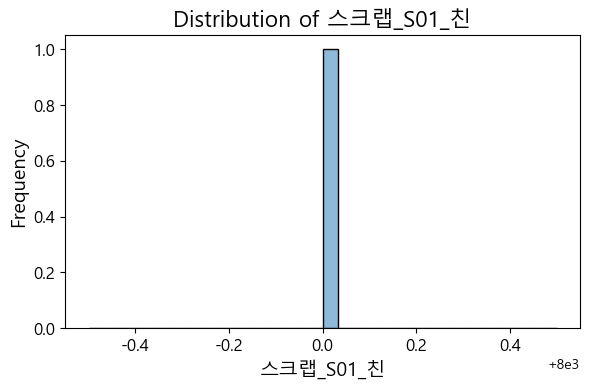

'스크랩_S01_친' has 1 non-NaN values.
A부스러기　친: Mean = 8290.57


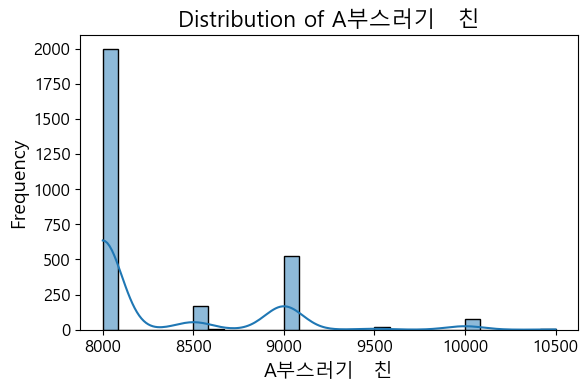

'A부스러기　친' has 2792 non-NaN values.
친단　친: Mean = 500.00


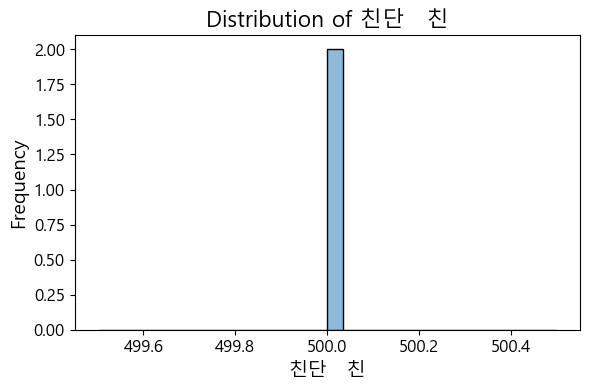

'친단　친' has 2 non-NaN values.
와셔 친: Mean = 652.44


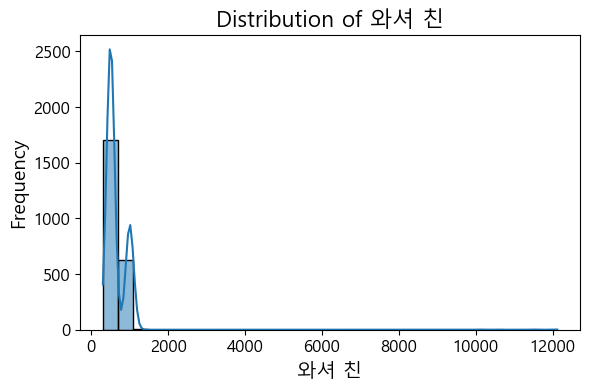

'와셔 친' has 2339 non-NaN values.
B부스러기　친: Mean = 11603.85


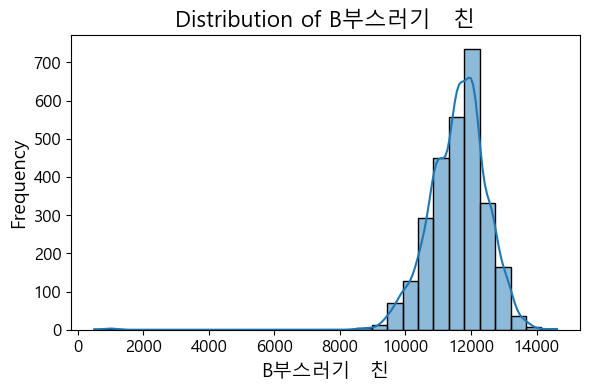

'B부스러기　친' has 2791 non-NaN values.
선다라이 친: Mean = 901.75


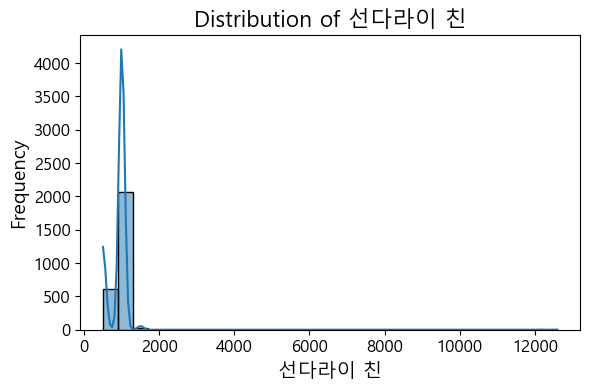

'선다라이 친' has 2708 non-NaN values.
류선 친: Mean = 750.00


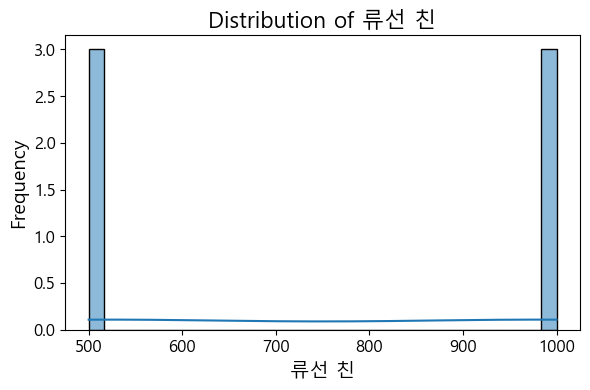

'류선 친' has 6 non-NaN values.
시타마와리(자동차 부품으로 예상됨)　친: Mean = 692.49


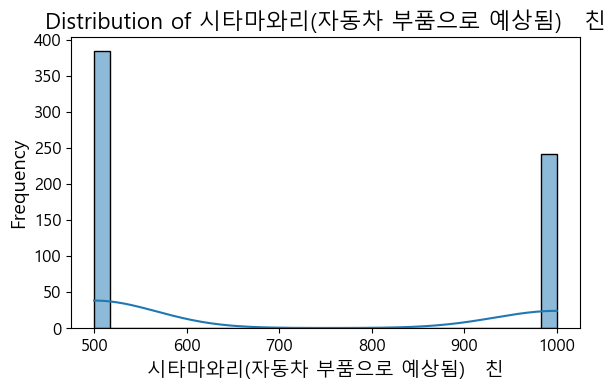

'시타마와리(자동차 부품으로 예상됨)　친' has 626 non-NaN values.
엔진 친: Mean = 631.35


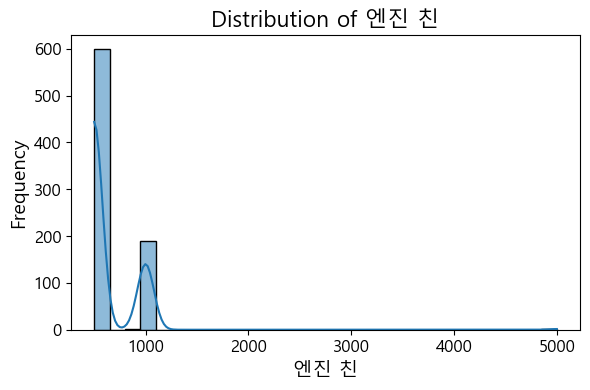

'엔진 친' has 791 non-NaN values.
슈레더 친: Mean = 5855.32


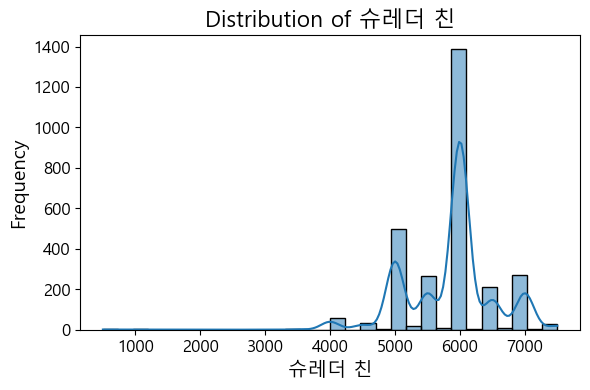

'슈레더 친' has 2791 non-NaN values.
C프레스 친: Mean = 1025.00


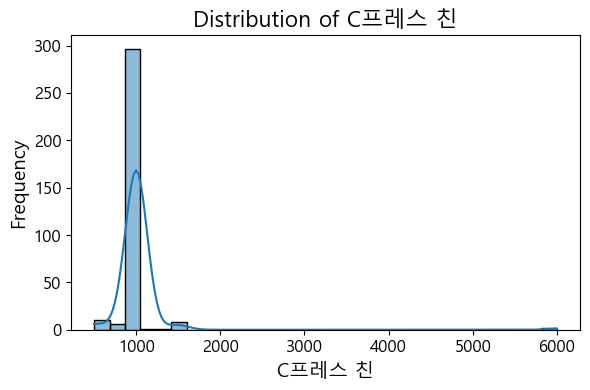

'C프레스 친' has 324 non-NaN values.
다라이가루 친: Mean = 875.00


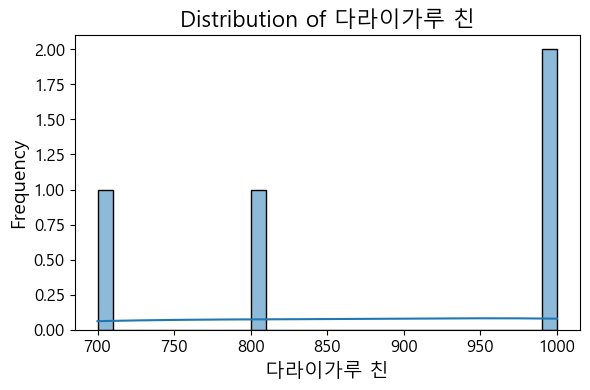

'다라이가루 친' has 4 non-NaN values.
강류 친: Mean = 706.26


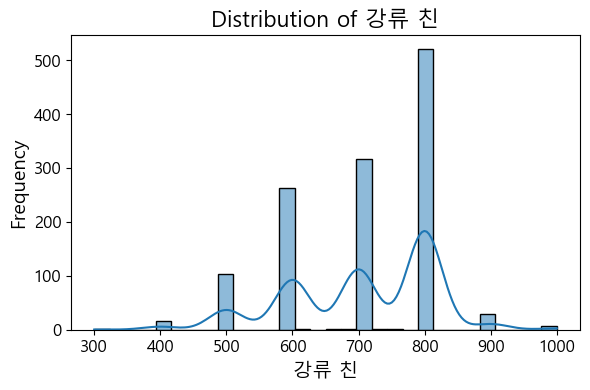

'강류 친' has 1262 non-NaN values.
타이어 친: Mean = 297.01


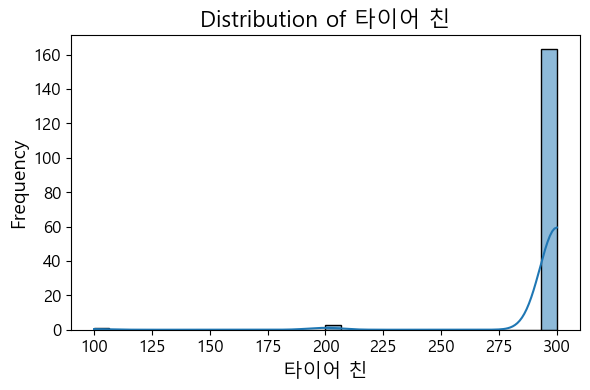

'타이어 친' has 167 non-NaN values.
주물　친: Mean = 358.87


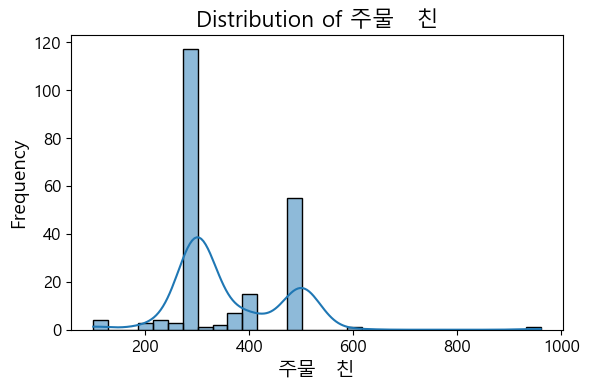

'주물　친' has 213 non-NaN values.
알루미더스트　친: Mean = nan


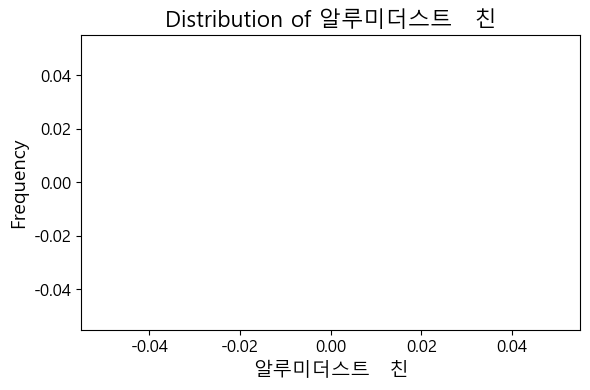

'알루미더스트　친' has 0 non-NaN values.
AB프레스　친: Mean = nan


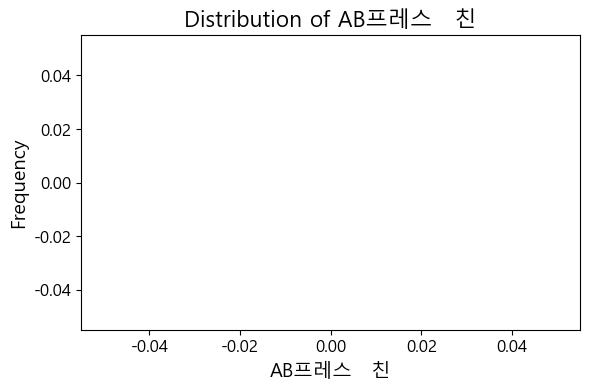

'AB프레스　친' has 0 non-NaN values.
Mn강　친: Mean = nan


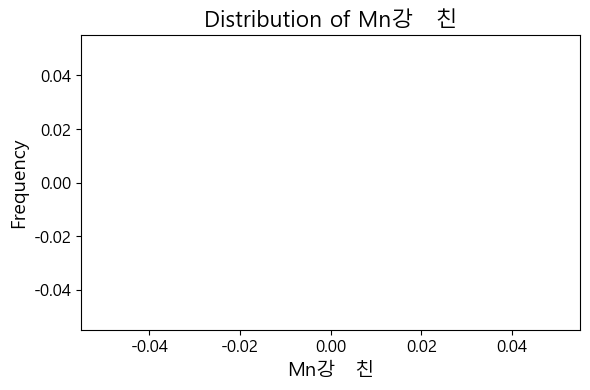

'Mn강　친' has 0 non-NaN values.
캔버서　친: Mean = 916.67


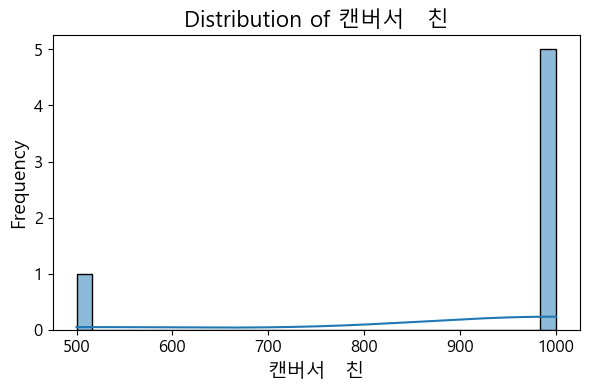

'캔버서　친' has 6 non-NaN values.
페인트캔　친: Mean = nan


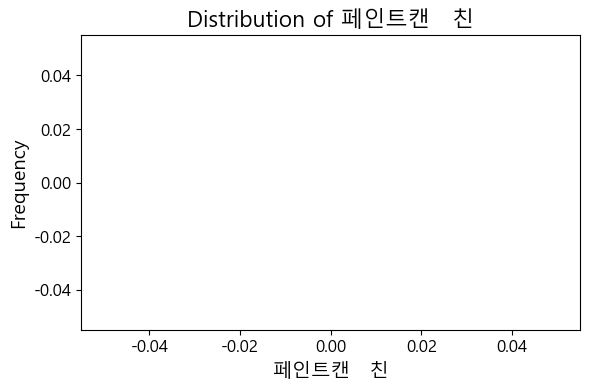

'페인트캔　친' has 0 non-NaN values.
V프레스　친: Mean = 402.18


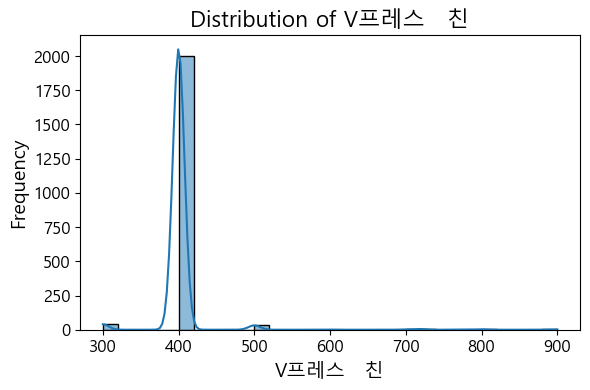

'V프레스　친' has 2085 non-NaN values.
캔프레스　친: Mean = 425.00


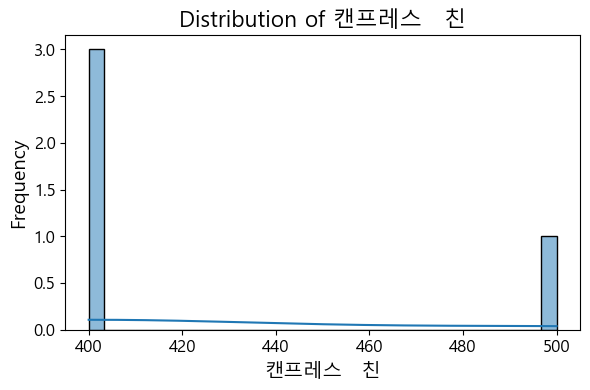

'캔프레스　친' has 4 non-NaN values.
빌렛부스러기　친: Mean = 708.97


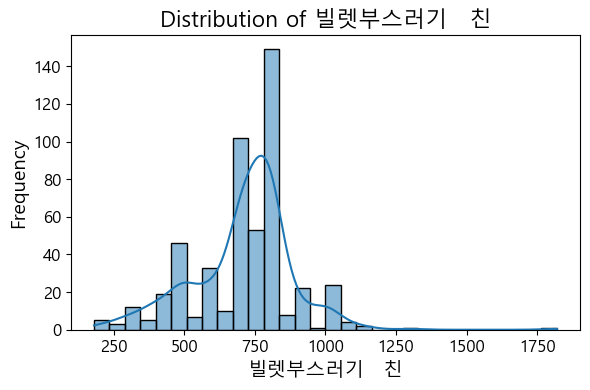

'빌렛부스러기　친' has 507 non-NaN values.
SC（레들）바탕쇠　친: Mean = 606.67


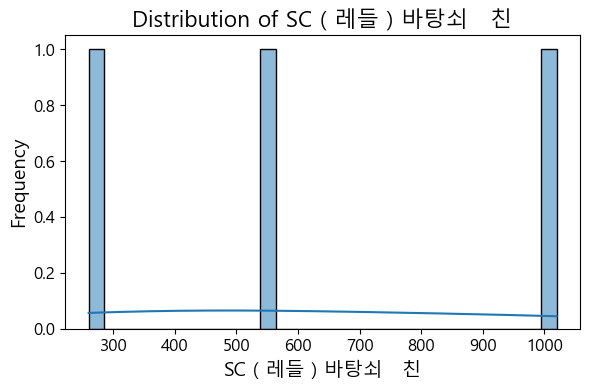

'SC（레들）바탕쇠　친' has 3 non-NaN values.
EF바탕쇠　친: Mean = 500.00


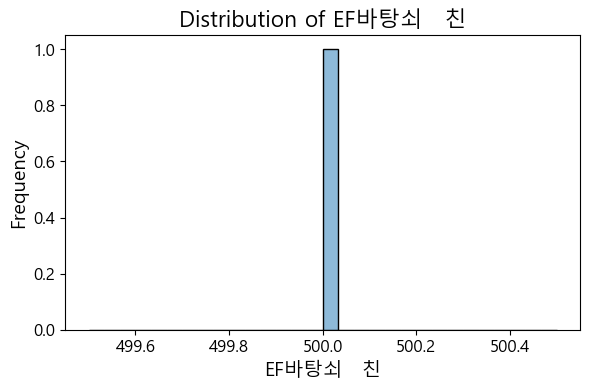

'EF바탕쇠　친' has 1 non-NaN values.
CC바탕쇠　친: Mean = nan


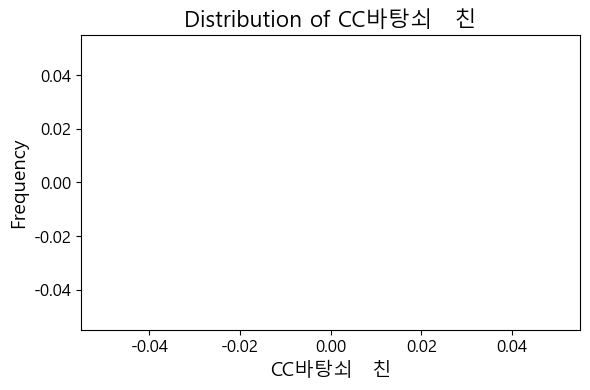

'CC바탕쇠　친' has 0 non-NaN values.
정비부스러기　친: Mean = 771.05


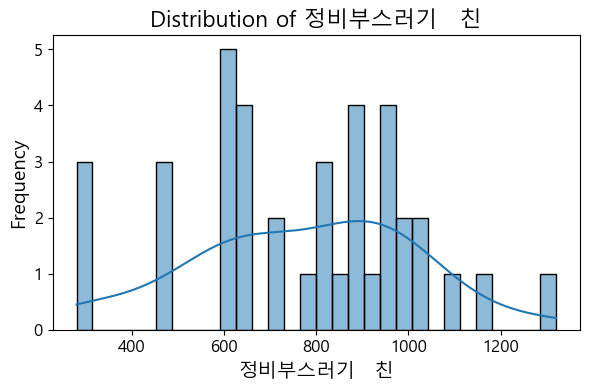

'정비부스러기　친' has 38 non-NaN values.
6


In [5]:
# Iterate through each variable group
counter = 0

for col in chin_variables:
    if col in df.columns:
        # Calculate mean
        mean_val = df[col].mean(skipna=True)
        print(f"{col}: Mean = {mean_val:.2f}")
        
        # Plot distribution
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f"Distribution of {col}", fontsize=16)
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.tight_layout()
        plt.show()
        non_nan_count = df[col].notna().sum()
        print(f"'{col}' has {non_nan_count} non-NaN values.")
        if non_nan_count >= 1500:
            counter += 1
print(counter)

# Plots

C:\Users\User\AppData\Local\Temp\ipykernel_9512\3075793870.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(variables))  # or "tab20", etc.


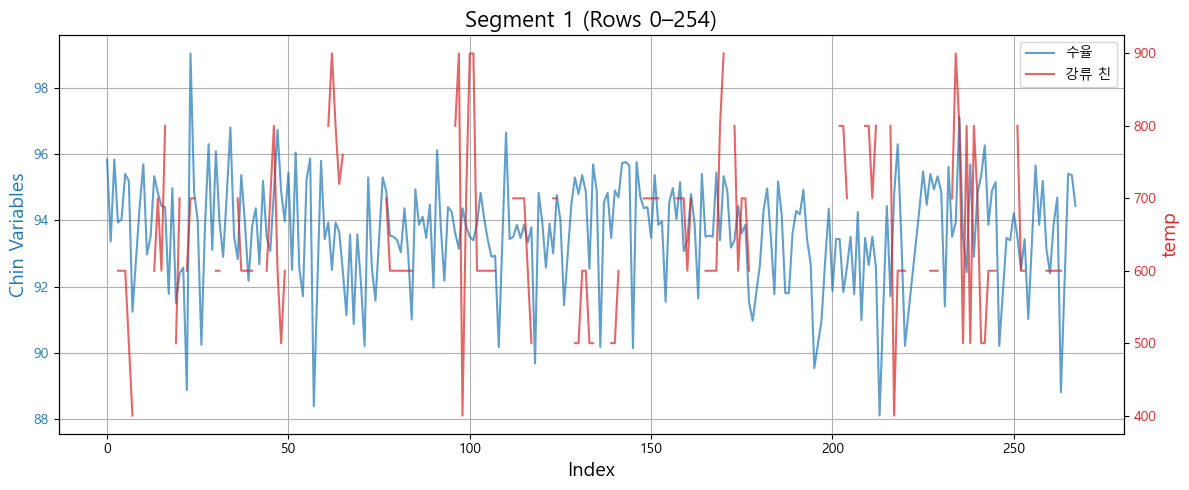

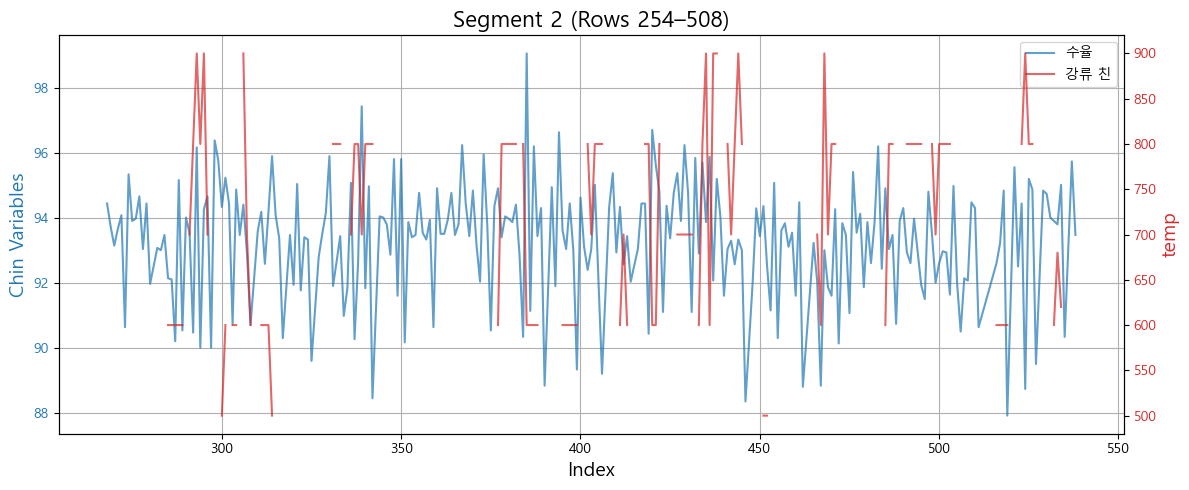

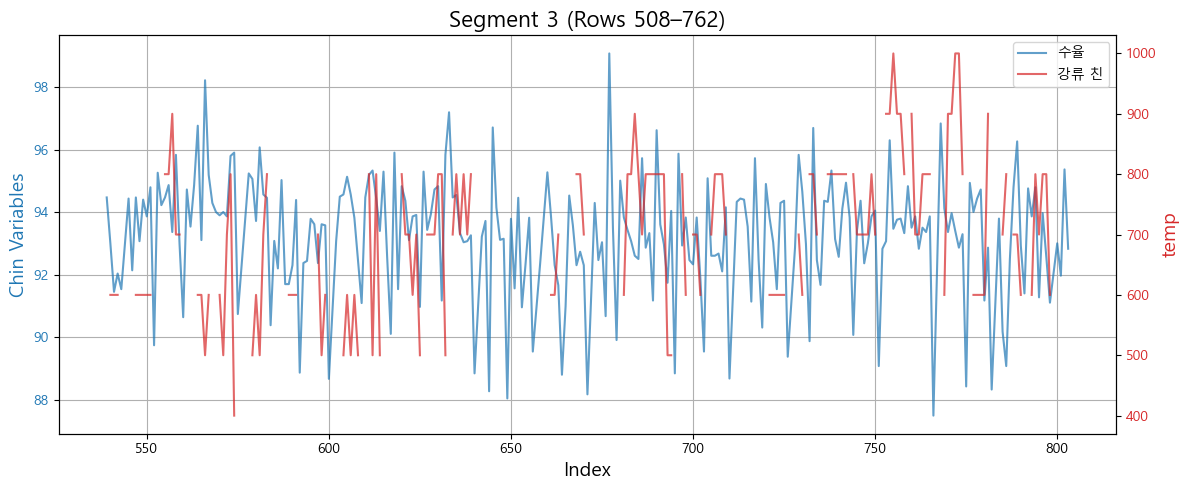

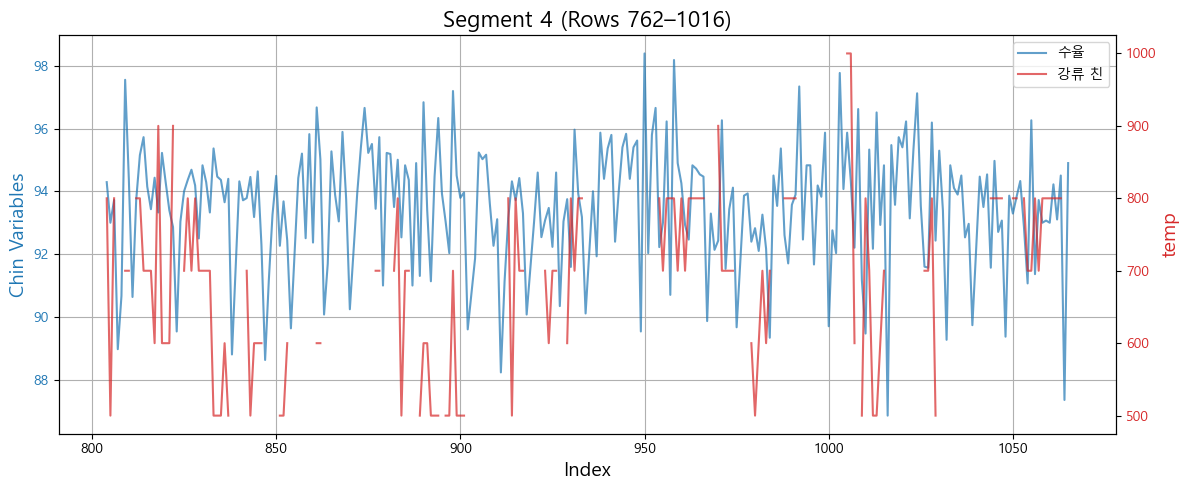

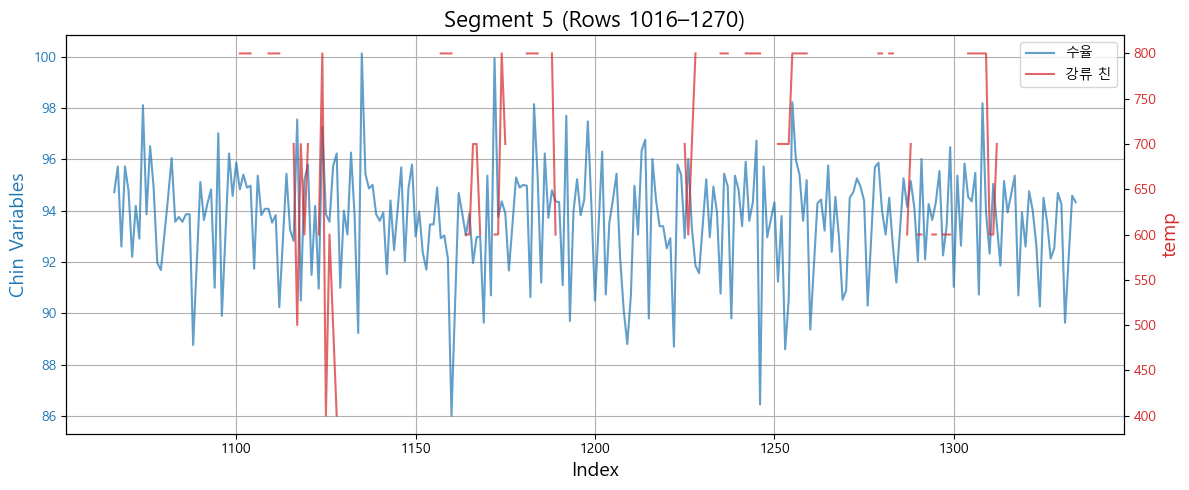

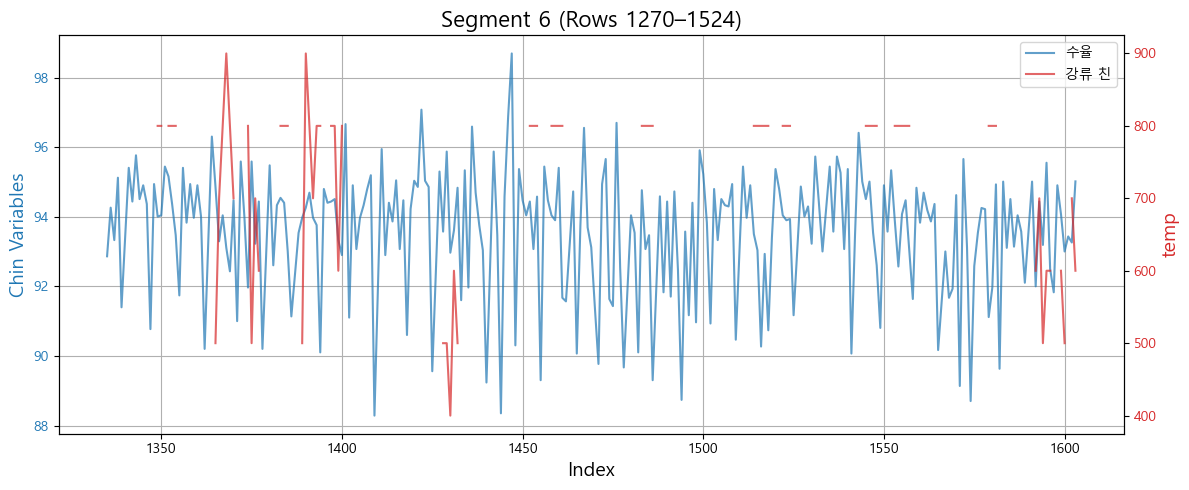

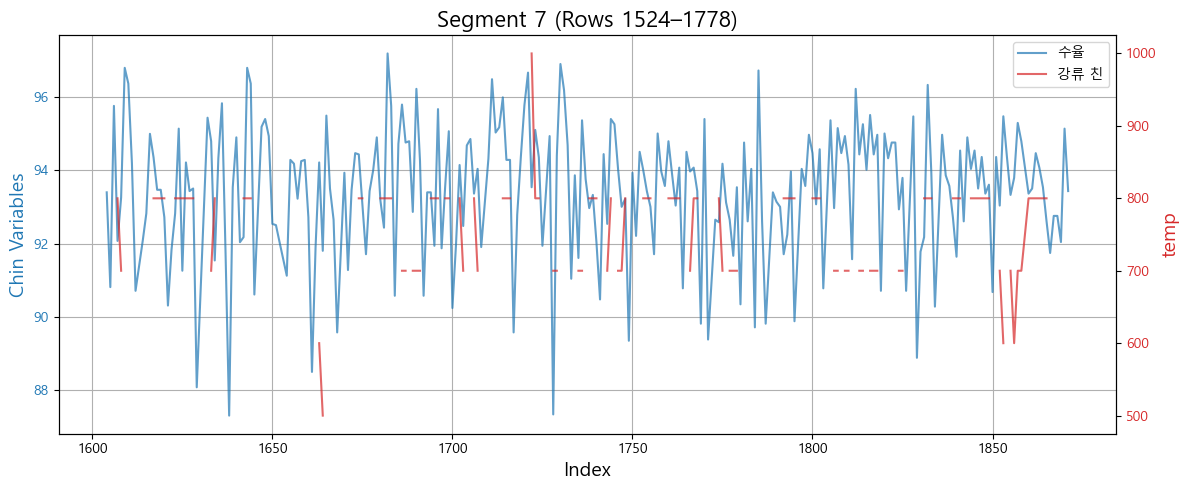

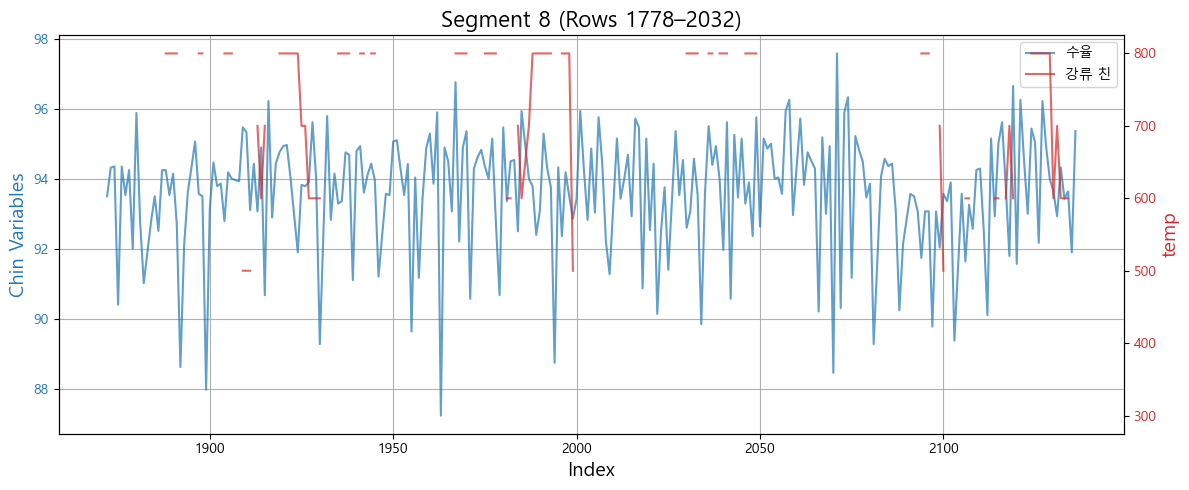

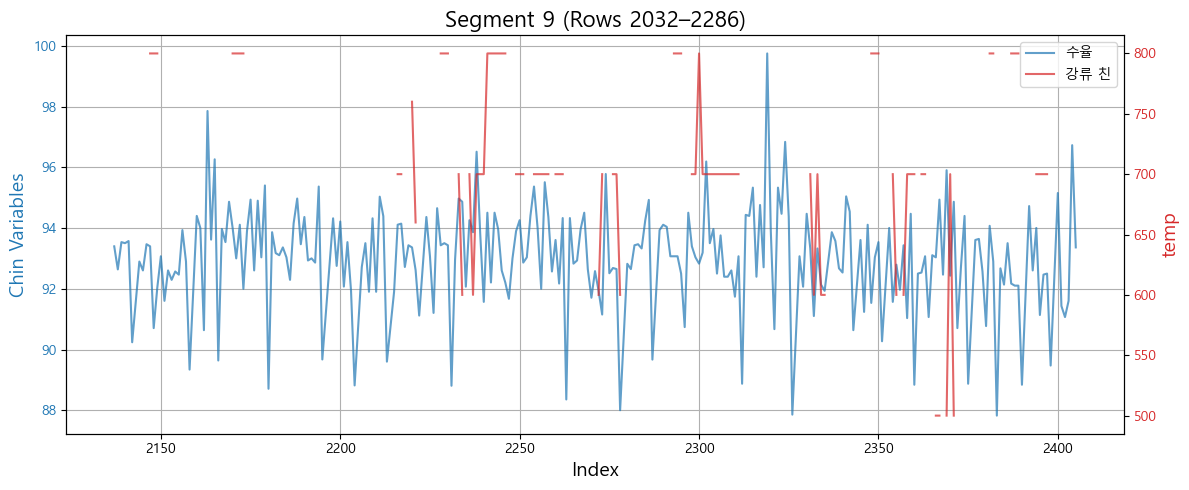

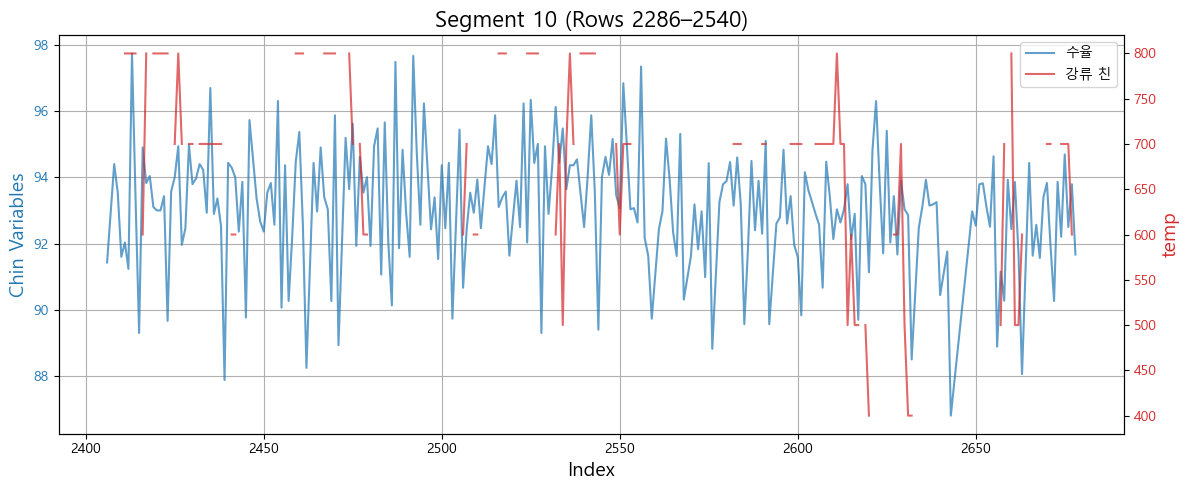

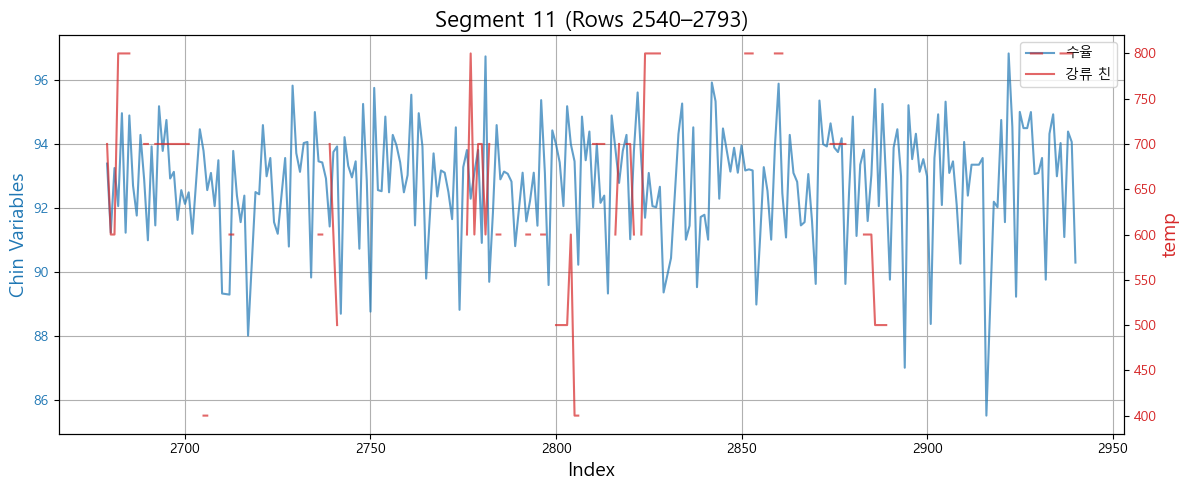

In [6]:
df['temp'] = df['A부스러기\u3000친'] + df['B부스러기\u3000친']
df['temp2'] = df[['와셔 친', '선다라이 친', 'V프레스\u3000친', '슈레더 친']].sum(axis=1)
variables = ['수율']
other = ['강류 친']

num_parts = 11
n = len(df)
part_size = math.ceil(n / num_parts)

colors = plt.cm.get_cmap("tab10", len(variables))  # or "tab20", etc.

for i in range(num_parts):
    start_idx = i * part_size
    end_idx = min((i + 1) * part_size, n)
    segment = df.iloc[start_idx:end_idx]

    fig, ax1 = plt.subplots(figsize=(12, 5))

    # LEFT Y-AXIS (e.g., chin_total)
    for col in variables:
        if col in df.columns:
            ax1.plot(segment.index, segment[col], label=col, color='tab:blue', alpha=0.7)
    ax1.set_xlabel("Index", fontsize=14)
    ax1.set_ylabel("Chin Variables", fontsize=14, color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # RIGHT Y-AXIS (e.g., 장입량t)
    ax2 = ax1.twinx()
    for col in other:
        if col in df.columns:
            ax2.plot(segment.index, segment[col], label=col, color='tab:red', alpha=0.7)
    ax2.set_ylabel("temp", fontsize=14, color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # Title and legend
    plt.title(f"Segment {i + 1} (Rows {start_idx}–{end_idx})", fontsize=16)
    ax1.grid(True)
    
    # Optional combined legend
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.show()

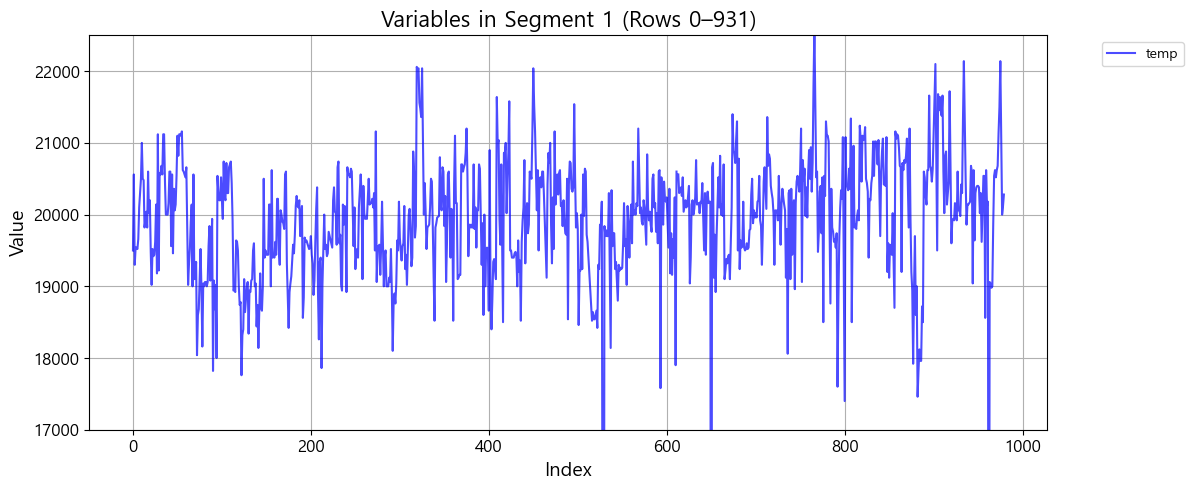

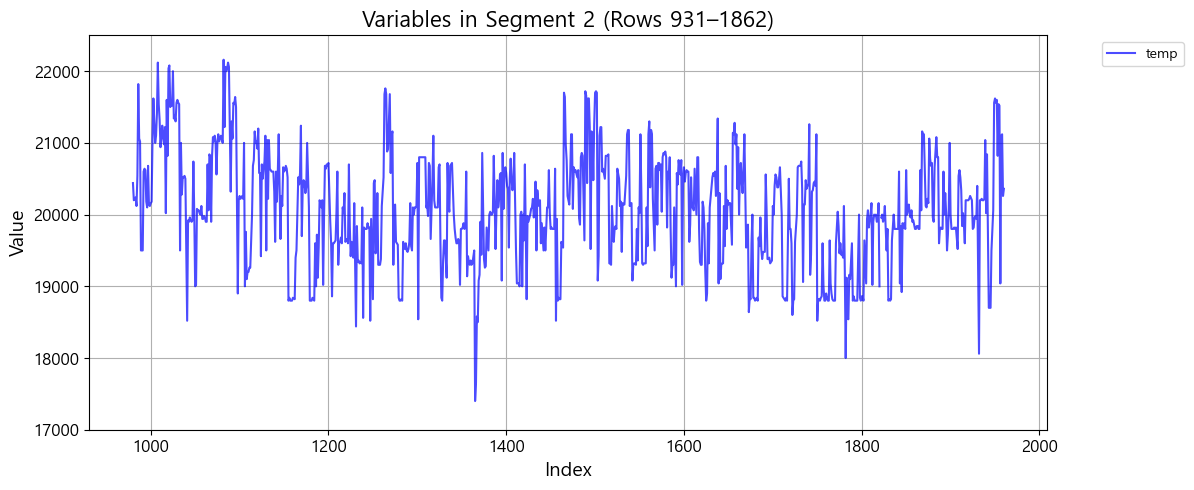

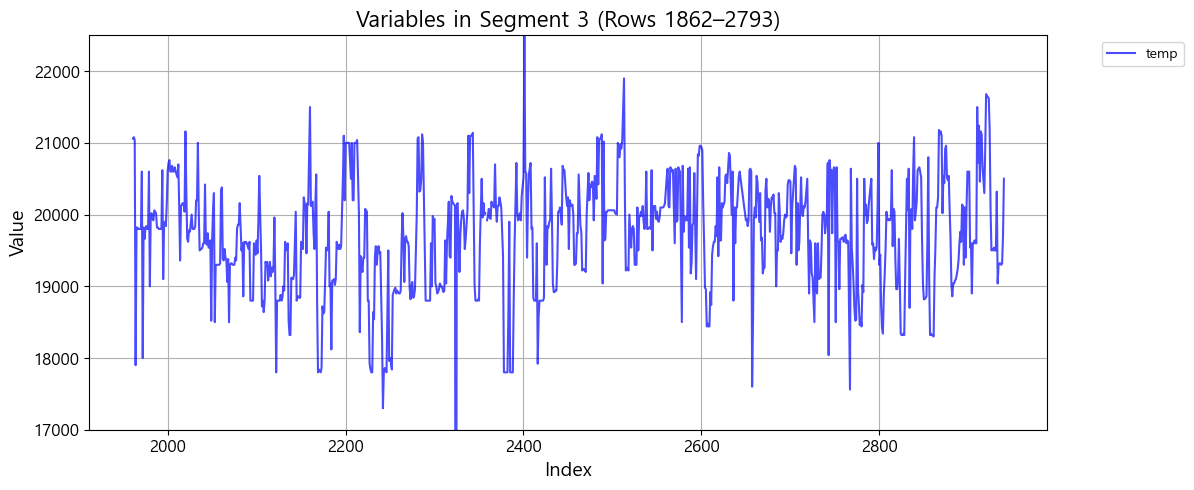

In [7]:
num_parts = 3
n = len(df)
part_size = math.ceil(n / num_parts)
for i in range(num_parts):
    start_idx = i * part_size
    end_idx = min((i + 1) * part_size, n)
    segment = df.iloc[start_idx:end_idx]

    plt.figure(figsize=(12, 5))
    plt.plot(segment.index, segment['temp'], label='temp', alpha=0.7, color='blue')  # 'col' was undefined
    plt.title(f"Variables in Segment {i + 1} (Rows {start_idx}–{end_idx})", fontsize=16)
    plt.xlabel("Index", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    
    # Set fixed y-axis limits
    plt.ylim(17000, 22500)

    # Optional: set fixed x-axis limits (useful if you want all plots to look identical in x-axis)
    # plt.xlim(start_idx, end_idx)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.show()

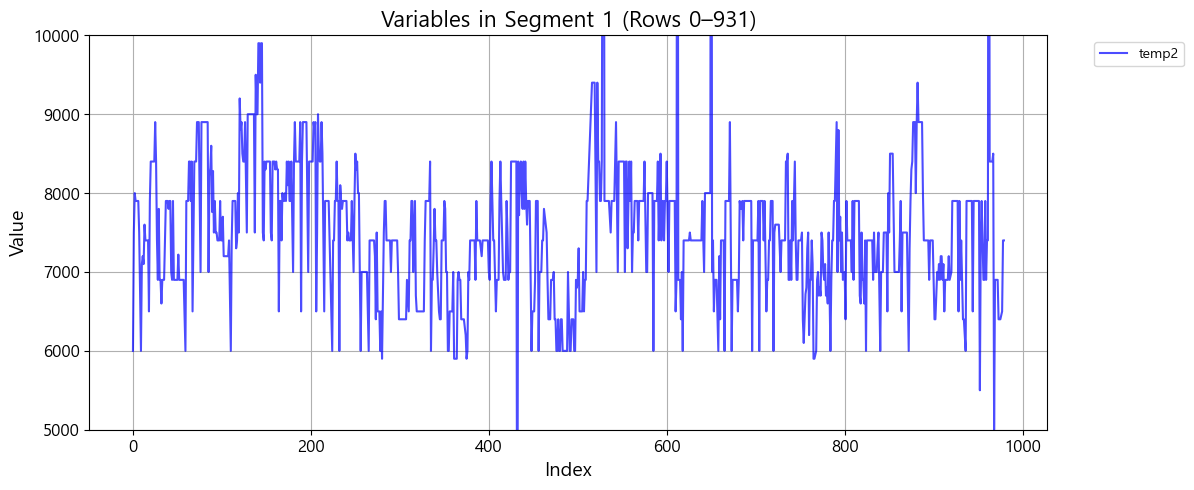

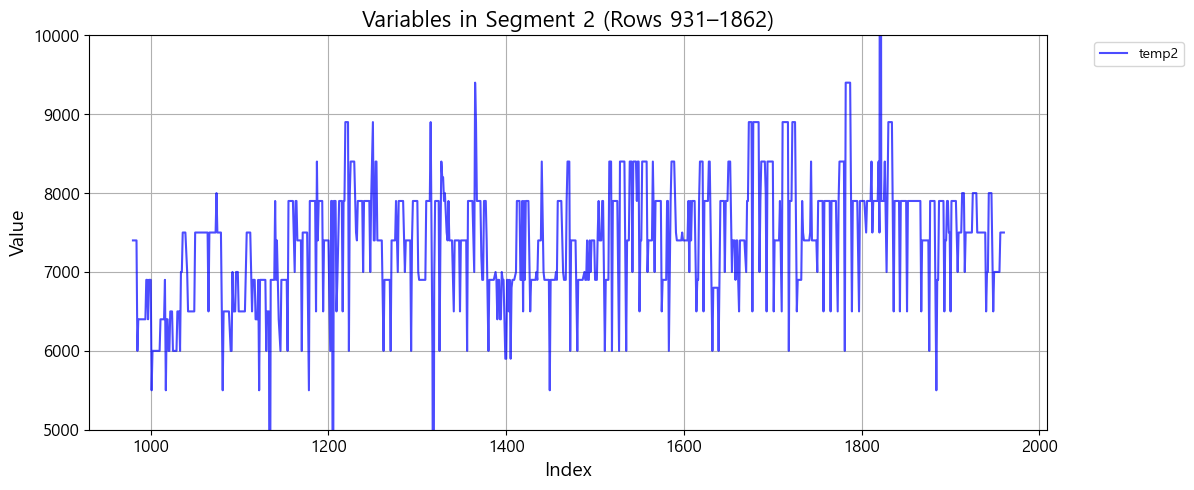

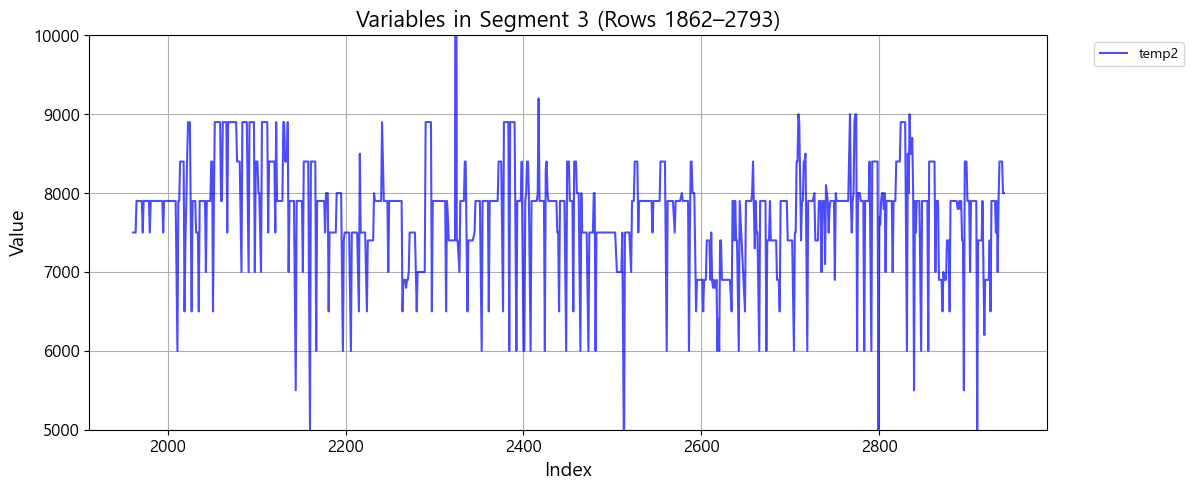

In [8]:
num_parts = 3
n = len(df)
part_size = math.ceil(n / num_parts)
for i in range(num_parts):
    start_idx = i * part_size
    end_idx = min((i + 1) * part_size, n)
    segment = df.iloc[start_idx:end_idx]

    plt.figure(figsize=(12, 5))
    plt.plot(segment.index, segment['temp2'], label='temp2', alpha=0.7, color='blue')  # 'col' was undefined
    plt.title(f"Variables in Segment {i + 1} (Rows {start_idx}–{end_idx})", fontsize=16)
    plt.xlabel("Index", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    
    # Set fixed y-axis limits
    plt.ylim(5000, 10000)

    # Optional: set fixed x-axis limits (useful if you want all plots to look identical in x-axis)
    # plt.xlim(start_idx, end_idx)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9512\2061134543.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(variables))  # or "tab20", etc.


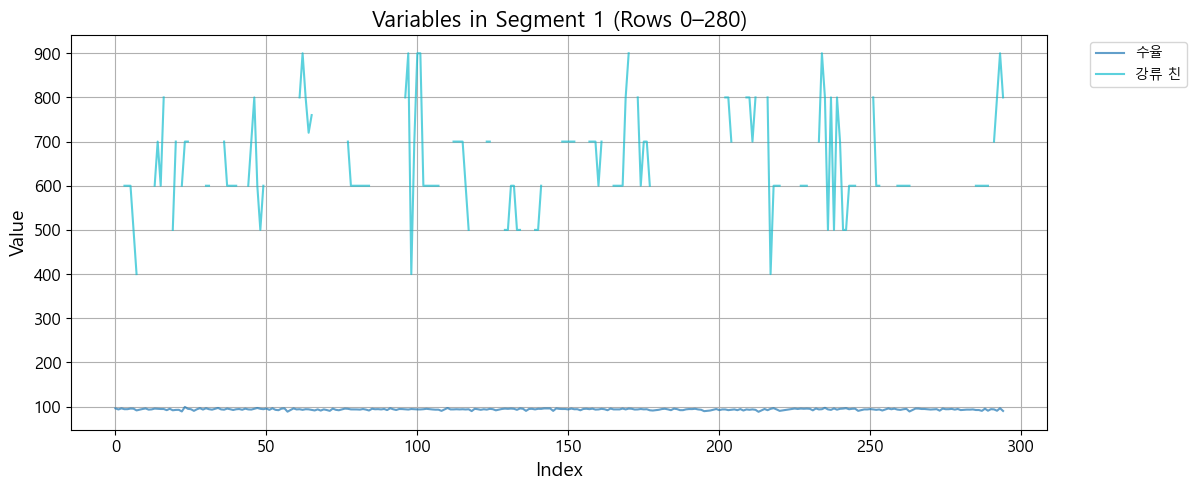

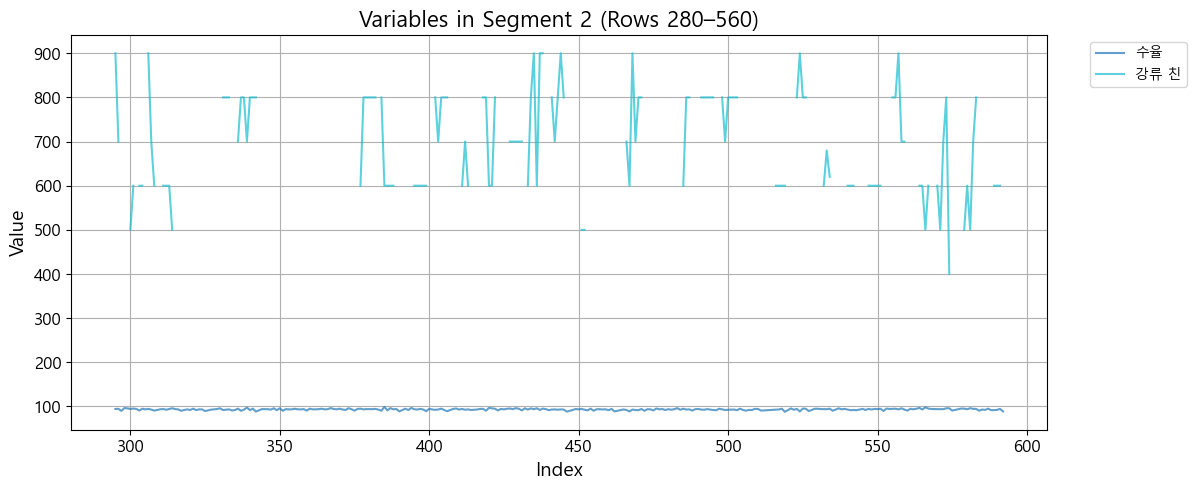

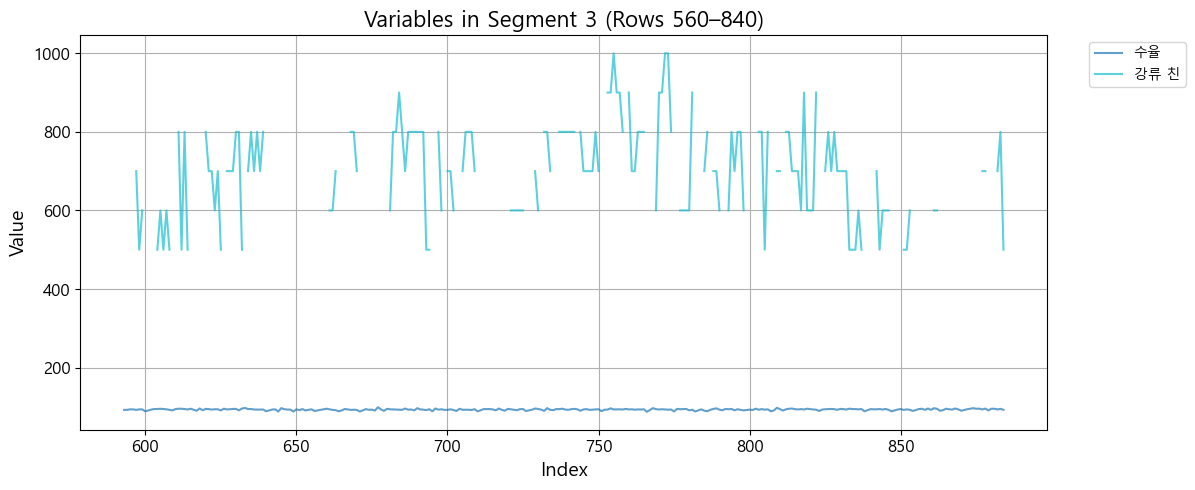

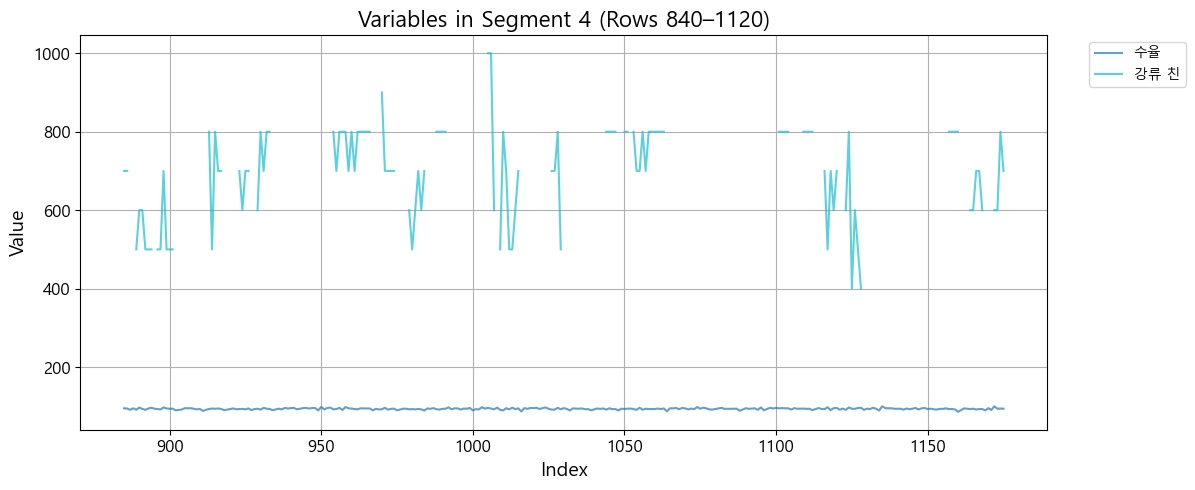

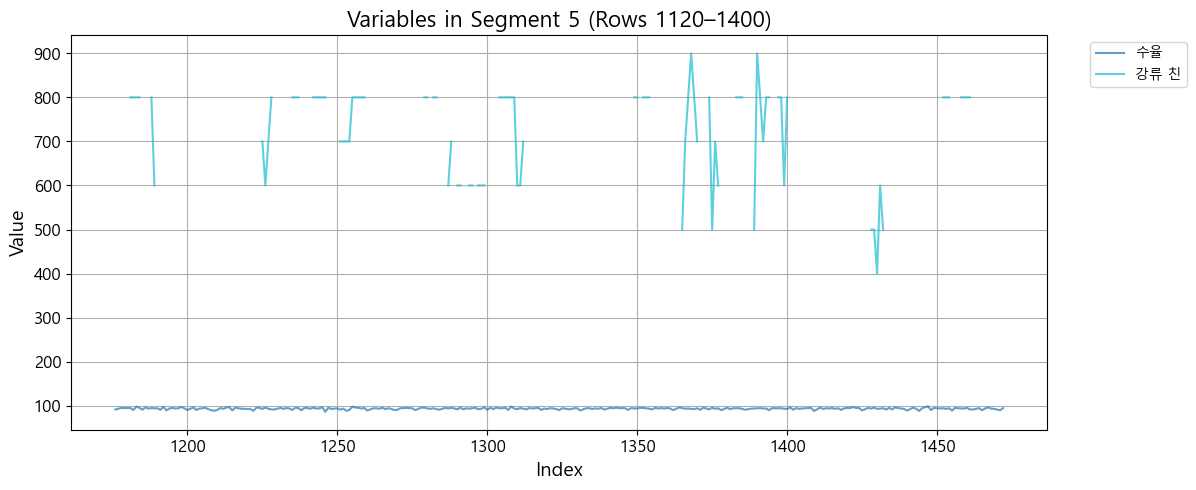

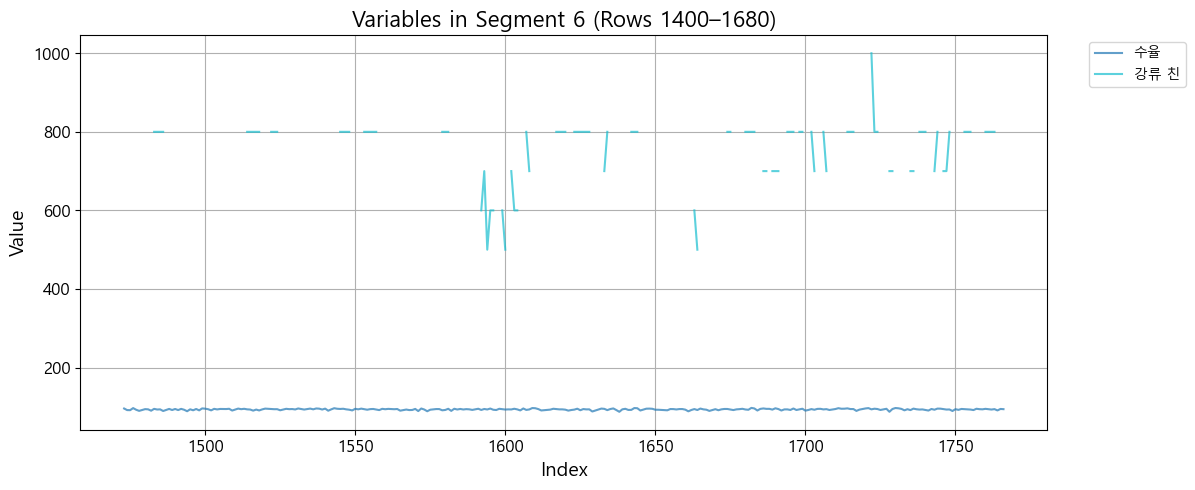

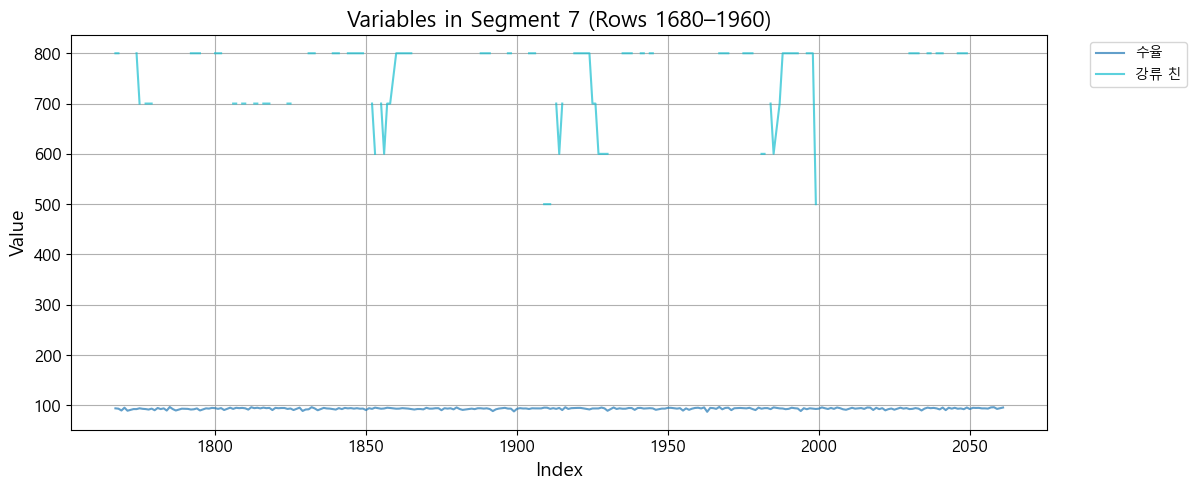

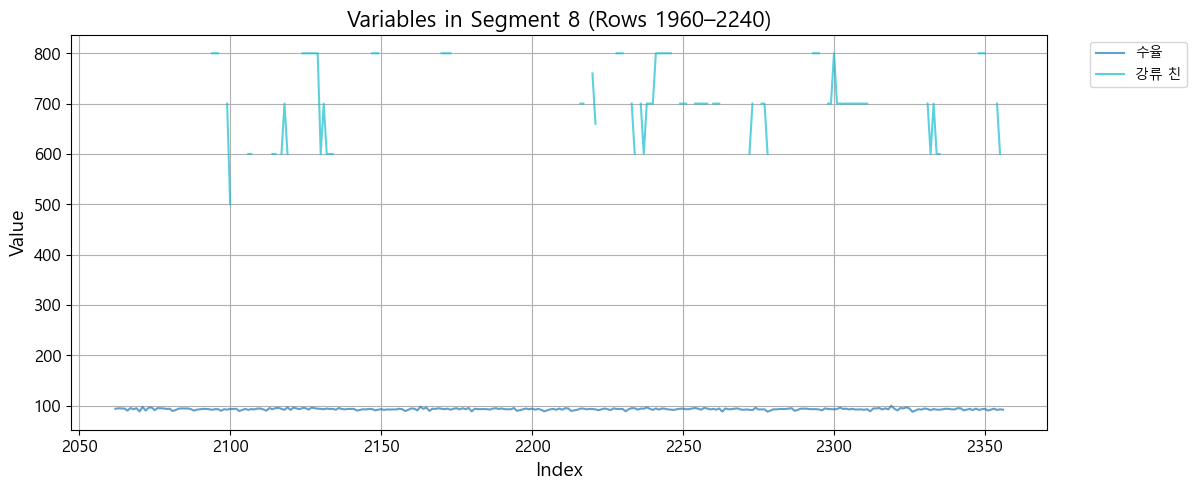

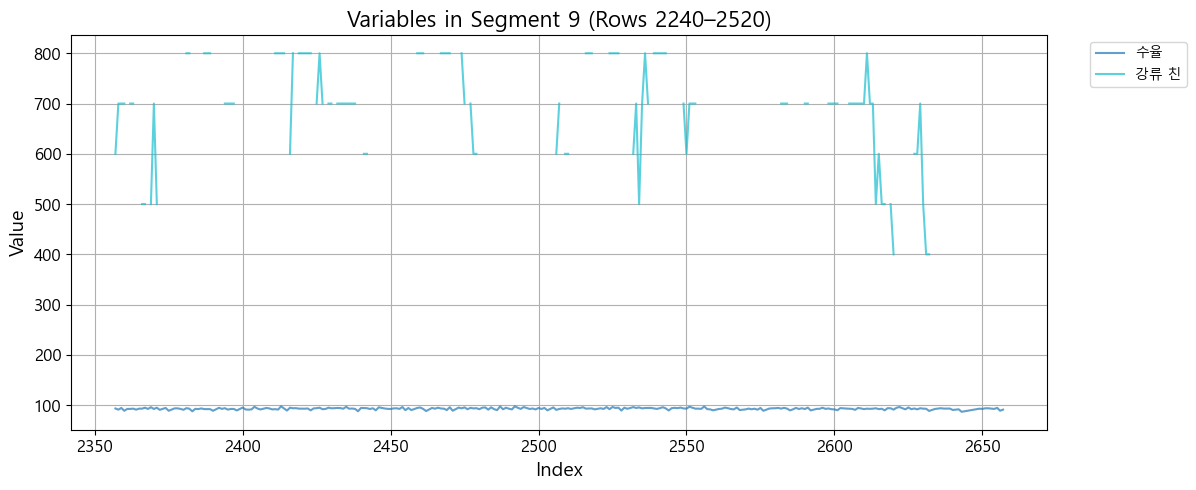

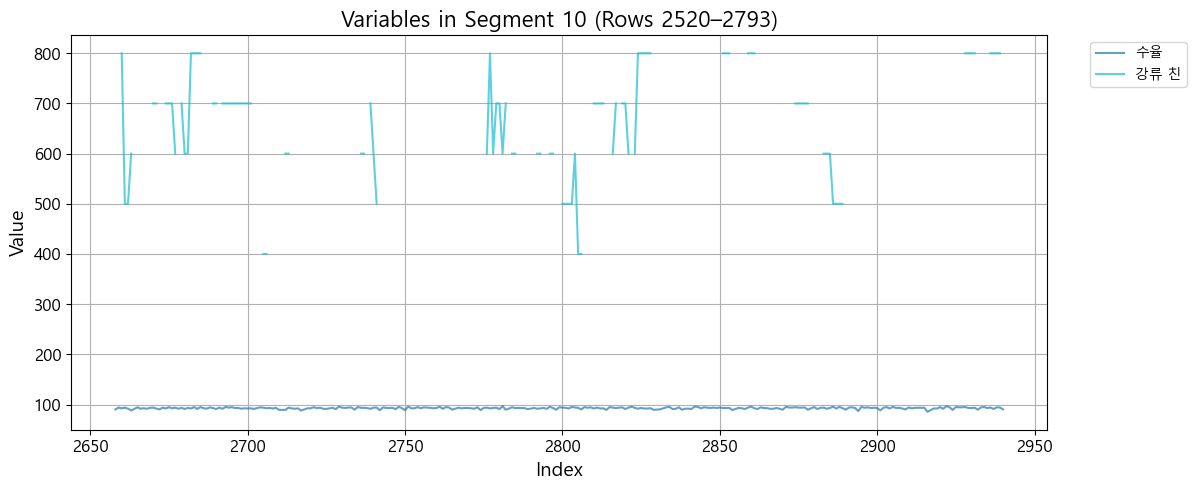

In [9]:
df['chin_total'] -= 14000
variables = [#'A부스러기\u3000친','B부스러기\u3000친', '슈레더 친', 'chin_total'
            '수율', '강류 친'
            ]

num_parts = 10
n = len(df)
part_size = math.ceil(n / num_parts)

colors = plt.cm.get_cmap("tab10", len(variables))  # or "tab20", etc.

for i in range(num_parts):
    start_idx = i * part_size
    end_idx = min((i + 1) * part_size, n)
    segment = df.iloc[start_idx:end_idx]

    plt.figure(figsize=(12, 5))
    
    for idx, col in enumerate(variables):
        if col in df.columns:
            plt.plot(segment.index, segment[col], label=col, alpha=0.7, color=colors(idx))
    
    plt.title(f"Variables in Segment {i + 1} (Rows {start_idx}–{end_idx})", fontsize=16)
    plt.xlabel("Index", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9512\1593738312.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(variables))  # or "tab20", etc.


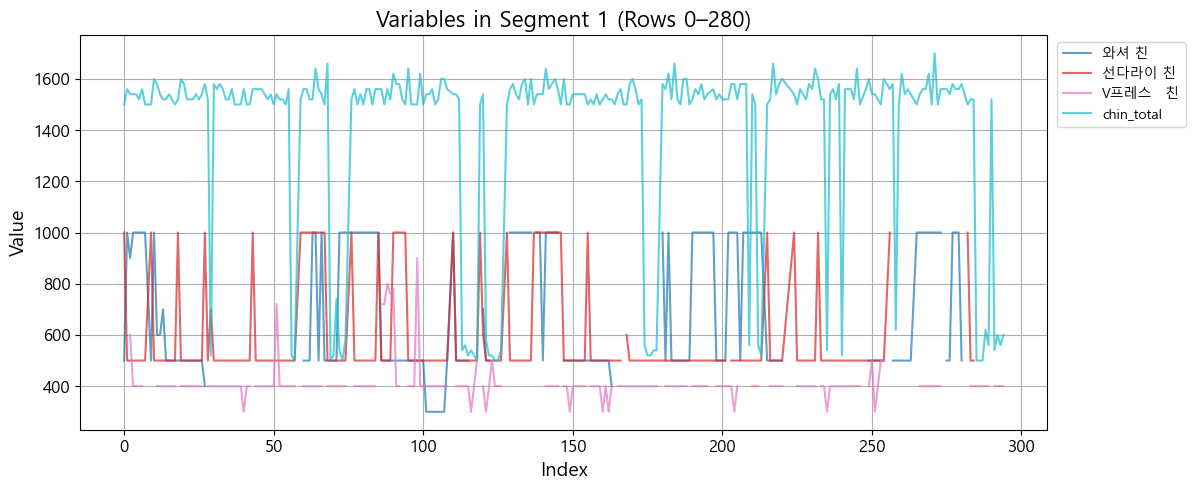

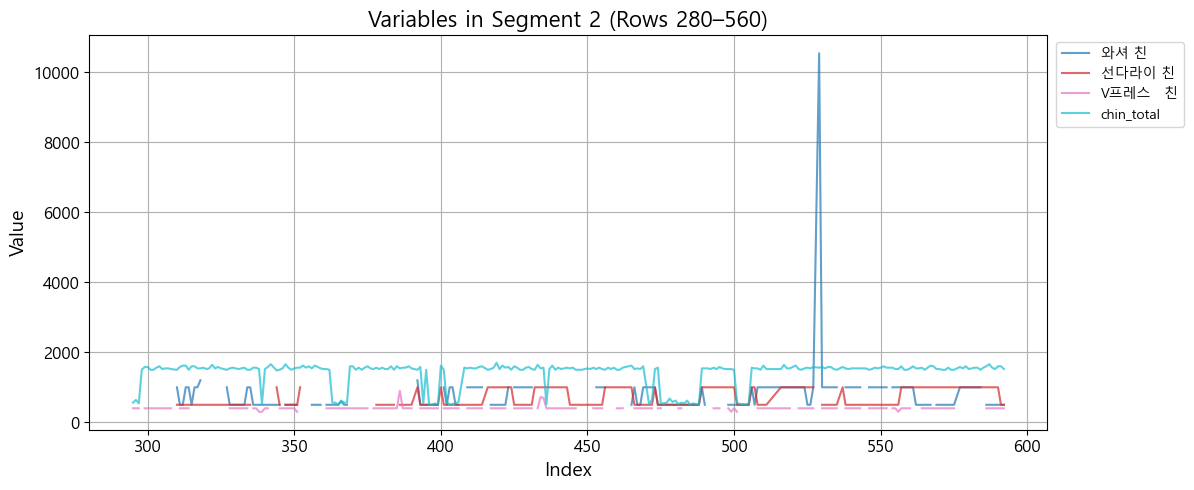

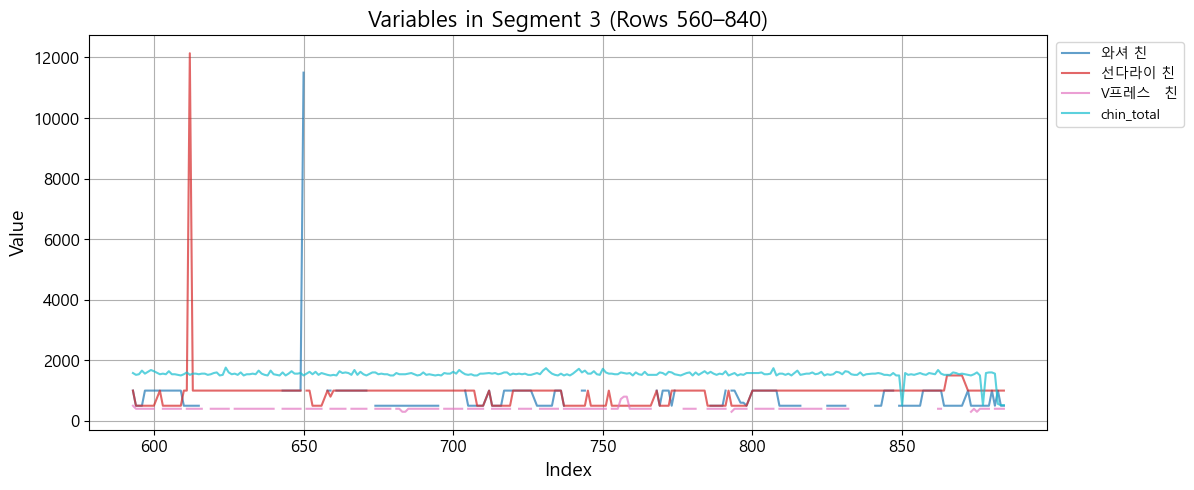

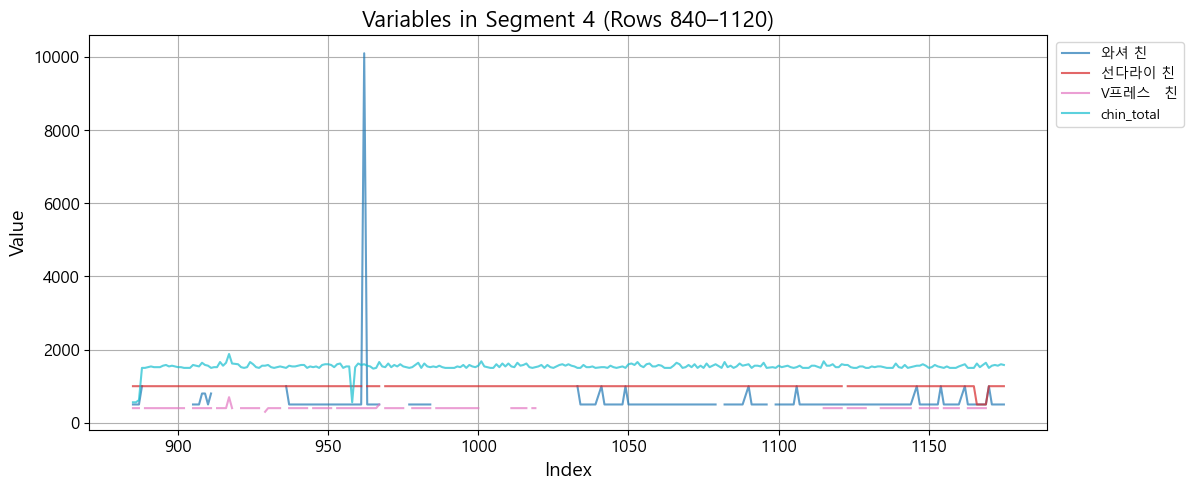

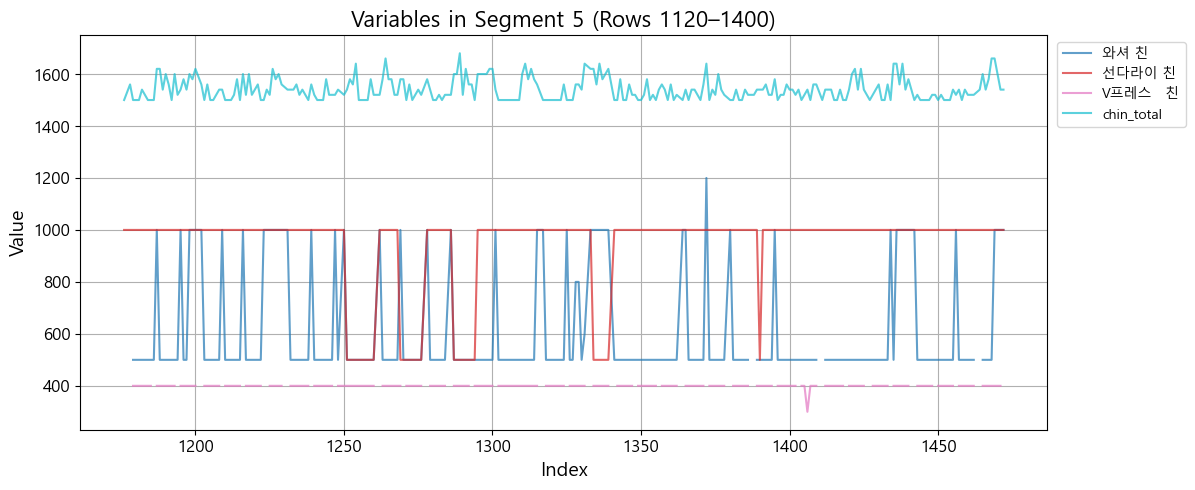

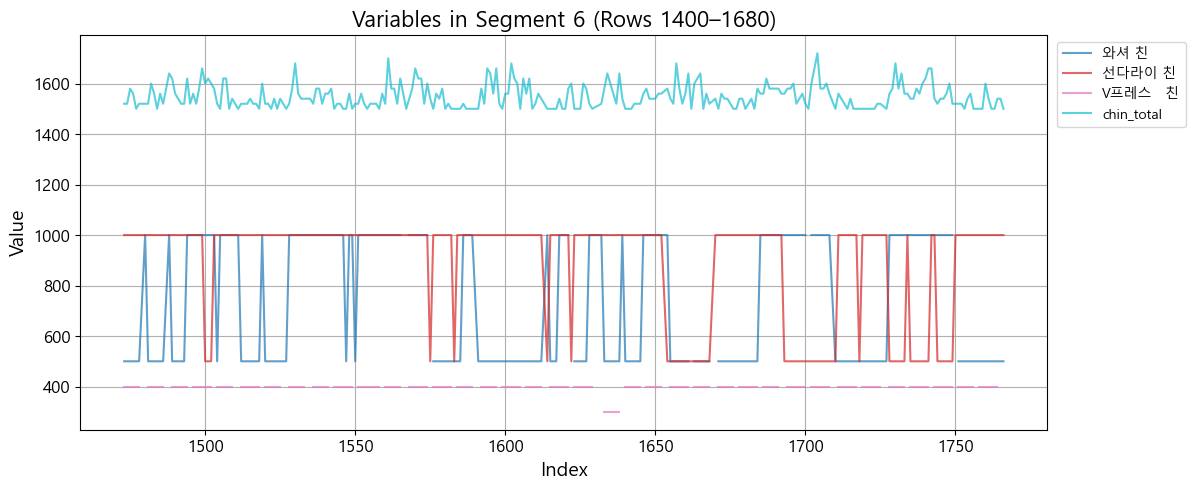

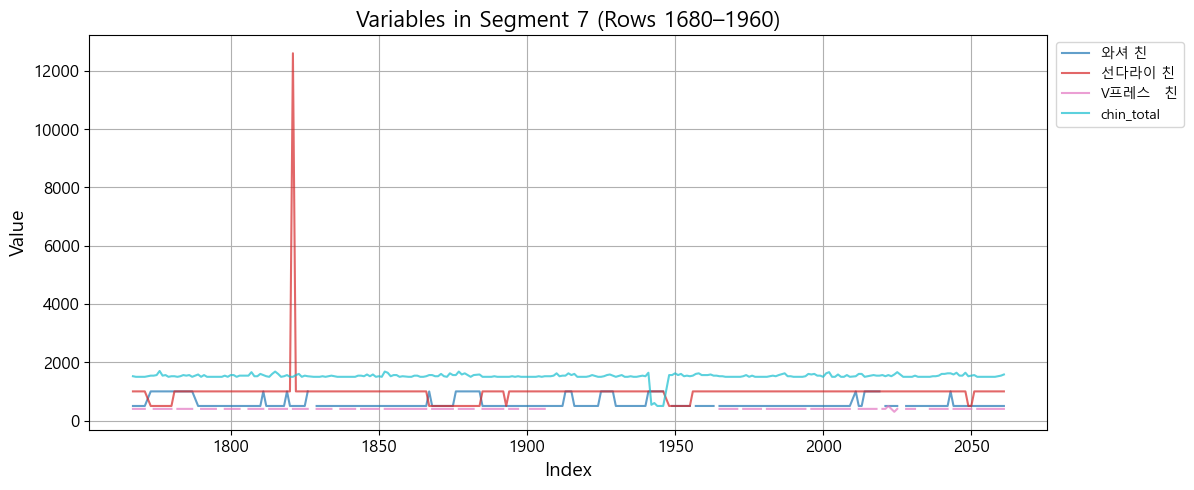

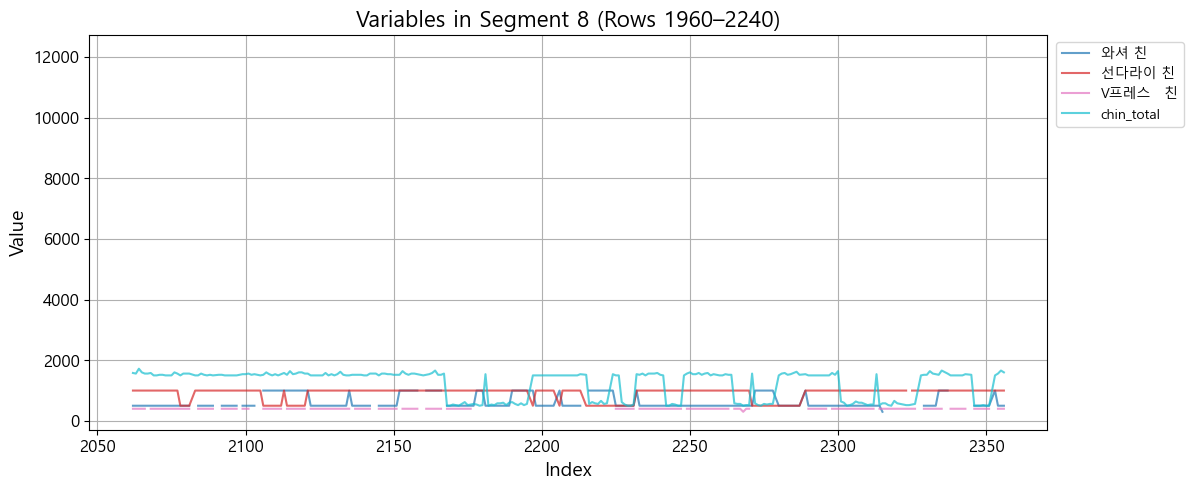

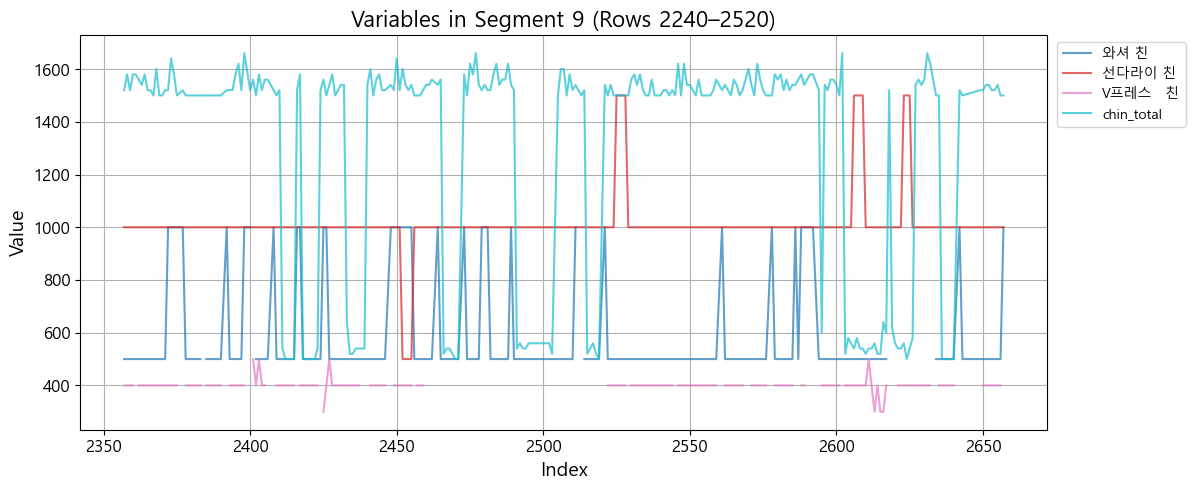

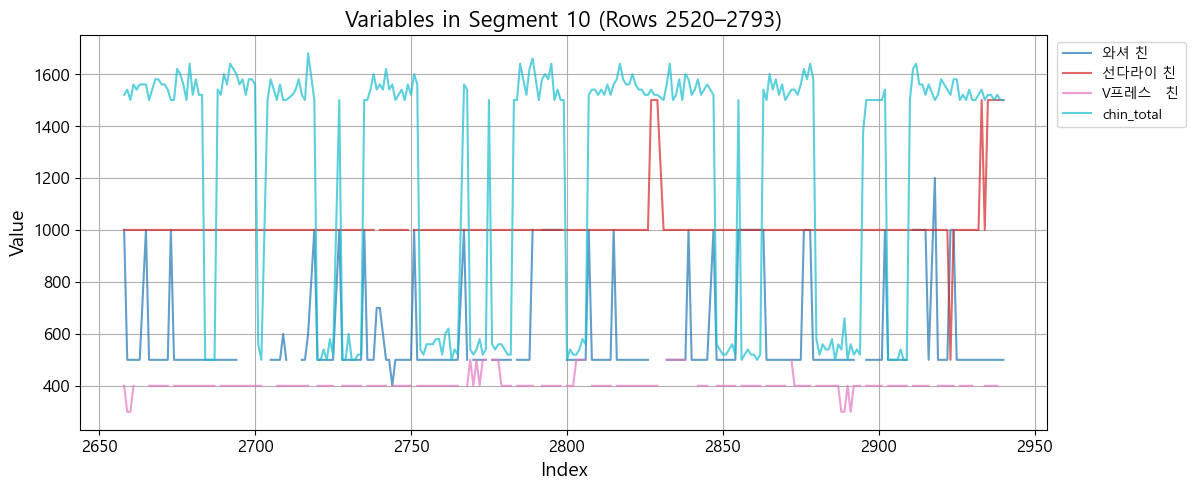

In [10]:
df['chin_total'] -= 13000
variables = ['와셔 친', '선다라이 친', 'V프레스\u3000친', 'chin_total']

num_parts = 10
n = len(df)
part_size = math.ceil(n / num_parts)

# Optional: assign unique colors for variables
colors = plt.cm.get_cmap("tab10", len(variables))  # or "tab20", etc.

for i in range(num_parts):
    start_idx = i * part_size
    end_idx = min((i + 1) * part_size, n)
    segment = df.iloc[start_idx:end_idx]

    plt.figure(figsize=(12, 5))
    
    for idx, col in enumerate(variables):
        if col in df.columns:
            plt.plot(segment.index, segment[col], label=col, alpha=0.7, color=colors(idx))
    
    plt.title(f"Variables in Segment {i + 1} (Rows {start_idx}–{end_idx})", fontsize=16)
    plt.xlabel("Index", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))
    plt.tight_layout()
    plt.show()